## Disciplina: MO911
## Tarefa 2 - Visualização de Dados      

- Aluno: Rubens de Castro Pereira - RA217146
- Professor: Sandro Rigo 
- Data: 06/12/202

### Definição 

Escolha um ou mais  datasets de alguma referência listada abaixo para gerar os 3 tipos de visualização de dados a seguir:
- um histograma
- um gráfico de barras ou pizza
- um gráfico de dispersão (scatter plot)

Sua resposta deve ser a submissão de um Jupyter notebook no formulário anexo a essa pergunta.

Lista de fontes para dados:

- https://github.com/awesomedata/awesome-public-datasets
- https://datasetsearch.research.google.com/ 
- http://archive.ics.uci.edu/ml/index.php
- https://www.kaggle.com/datasets
- https://synthea.mitre.org/
- https://opendatasus.saude.gov.br/dataset/notificacoes-de-sindrome-gripal-leve-2021

### Import libraries

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Loading datasets

The dataset contains data of FIFA World Cup matches.

In [43]:
df_fifa_world_cup = pd.read_csv('./datasets/Fifa_world_cup_matches.csv')
print('FIFA World Cup')
print(df_fifa_world_cup.describe)
print()

FIFA World Cup
<bound method NDFrame.describe of              team1           team2 possession team1 possession team2  \
0            QATAR         ECUADOR              42%              50%   
1          ENGLAND            IRAN              72%              19%   
2          SENEGAL     NETHERLANDS              44%              45%   
3    UNITED STATES           WALES              51%              39%   
4        ARGENTINA    SAUDI ARABIA              64%              24%   
5          DENMARK         TUNISIA              55%              33%   
6           MEXICO          POLAND              54%              31%   
7           FRANCE       AUSTRALIA              56%              35%   
8          MOROCCO         CROATIA              32%              57%   
9          GERMANY           JAPAN              65%              22%   
10           SPAIN      COSTA RICA              74%              17%   
11         BELGIUM          CANADA              46%              43%   
12     SWITZERL

### Processing data for the graphs

In [44]:
# setting data 
columns = ['category', 'number of goals team1', 'number of goals team2']
categories = df_fifa_world_cup[columns].groupby(['category'], as_index=False).sum()
categories['category_letter'] = categories['category'].str[-1]
categories.at[8, 'category_letter'] = 'I'   # adjusting last group 
categories['number of goals team'] = categories['number of goals team1'] + categories['number of goals team2']
print(categories)

      category  number of goals team1  number of goals team2 category_letter  \
0      Group A                      5                     10               A   
1      Group B                      7                      9               B   
2      Group C                      6                      6               C   
3      Group D                      8                      3               D   
4      Group E                     13                      9               E   
5      Group F                      6                      5               F   
6      Group G                     10                      6               G   
7      Group H                      9                      8               H   
8  Round of 16                      5                      2               I   

   number of goals team  
0                    15  
1                    16  
2                    12  
3                    11  
4                    22  
5                    11  
6                

### Histogram

In [45]:
# concatenating goals of the two teams 
total_number_goals_teams = pd.concat([df_fifa_world_cup['number of goals team1'], df_fifa_world_cup['number of goals team2']])
total_number_goals_teams

0     0
1     6
2     0
3     1
4     1
     ..
45    1
46    3
47    0
48    1
49    1
Length: 100, dtype: int64

Text(0, 0.5, 'Number of teams')

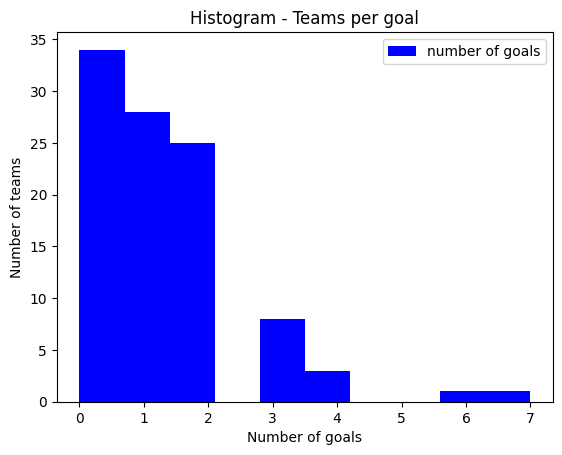

In [46]:
# setting colors and names
colors=['blue']
names=['number of goals']

# plotting histogram 
plt.hist(total_number_goals_teams, color=colors, label=names)
# plt.plot()



# plt.hist(histogram_df['unemploy'], rwidth=0.9)
# plt.title('Taxa de desemprego no Brasil')
# plt.xlabel('Taxa de desemprego')
# plt.ylabel('Frequência mensal')

# setting the legend and labels
plt.legend()
plt.title('Histogram - Teams per goal')
plt.xlabel('Number of goals')
plt.ylabel('Number of teams')



### Bar graph

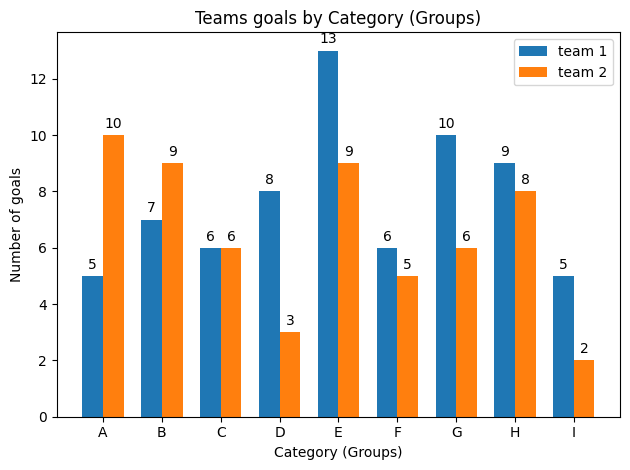

In [47]:
# setting labels and values 
labels = categories['category_letter']
goal_team1 = categories['number of goals team1']
goal_team2 = categories['number of goals team2']

# configuring plot 
x = np.arange(len(labels)) 
width = 0.35

# setting figure 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, goal_team1, width, label='team 1')
rects2 = ax.bar(x + width/2, goal_team2, width, label='team 2')

# adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of goals')
ax.set_xlabel('Category (Groups)')
ax.set_title('Teams goals by Category (Groups)')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

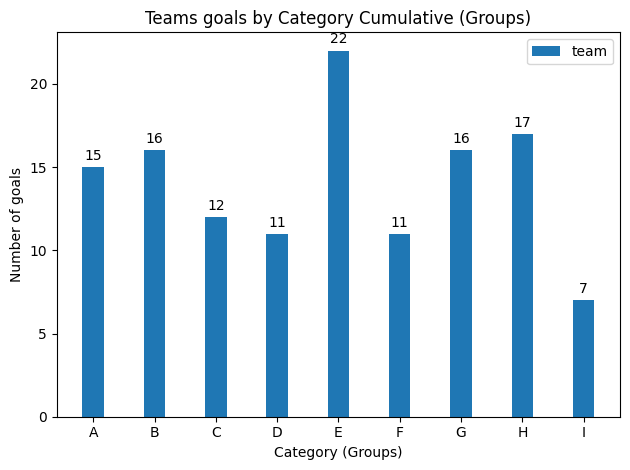

In [48]:
# setting labels and values 
labels = categories['category_letter']
goal_team = categories['number of goals team']

# configuring plot 
x = np.arange(len(labels)) 
width = 0.35

# setting figure 
fig, ax = plt.subplots()
rects = ax.bar(x, goal_team, width, label='team')

# adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of goals')
ax.set_xlabel('Category (Groups)')
ax.set_title('Teams goals by Category Cumulative (Groups)')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects, padding=3)

fig.tight_layout()

plt.show()

## Pizza graph

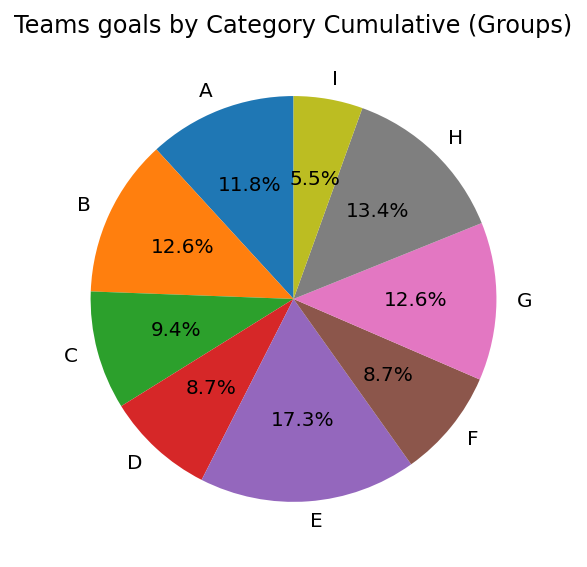

In [49]:
# setting labels and values 
labels = categories['category_letter']
goal_team = categories['number of goals team']

# the same figure for both subplots
fig = plt.figure(figsize=(10,10),dpi=144)

# axes object for the first pie chart 
ax = fig.add_subplot(121)

# plot first pie chart in ax1 
ax.pie(goal_team, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax.set_title('Teams goals by Category Cumulative (Groups)')

plt.show()

## Gráfico de dispersão (scatter plot)

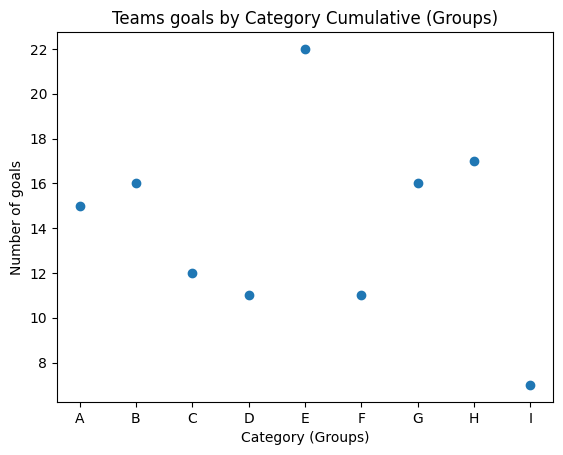

In [50]:
# setting labels and values 
x_value = categories['category_letter']
y_value = categories['number of goals team']


# the same figure for both subplots
fig, ax = plt.subplots()

# plot first pie chart in ax1 
ax.scatter(x_value, y_value)

ax.set_ylabel('Number of goals')
ax.set_xlabel('Category (Groups)')
ax.set_title('Teams goals by Category Cumulative (Groups)')

plt.show()